In [1]:
import numpy as np
import pandas as pd

from pandas import read_csv

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML



import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import scipy

from scipy.stats.stats import spearmanr
from scipy.stats import chi2_contingency

%matplotlib inline
from matplotlib.pyplot import pie, axis, show
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4


**A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.**

In [2]:
df = pd.read_csv('kiva_loans.csv', delimiter = ',')



In [3]:
#df.head()

In [4]:
#df.info()

In [5]:
#df['tags'].unique()

In [6]:
#Handling missing values

df['use'].fillna(method="ffill", inplace = True)
df['country_code'].fillna(method="ffill", inplace = True)
df['region'].fillna(method="ffill", inplace = True)
df['borrower_genders'].fillna(method="ffill", inplace = True)
df['tags'].fillna(method="ffill", inplace = True)
df['tags'].fillna(method="bfill", inplace = True)
df['disbursed_time'].fillna(method="ffill", inplace = True)
df['funded_time'].fillna(method="ffill", inplace = True)
df['partner_id'].interpolate(method="linear", inplace = True)


In [7]:
#missing values

#pd.DataFrame(df.isnull().sum())


In [8]:

data = pd.DataFrame()
data = df.drop(['id','partner_id', 'use', 'posted_time', 'disbursed_time','borrower_genders', 'funded_time',  'tags', 'date','activity','country','region'], axis =1)
data.head()


,funded_amount,loan_amount,sector,country_code,currency,term_in_months,lender_count,repayment_interval
0,300.0,300.0,Food,PK,PKR,12.0,12,irregular
1,575.0,575.0,Transportation,PK,PKR,11.0,14,irregular
2,150.0,150.0,Transportation,IN,INR,43.0,6,bullet
3,200.0,200.0,Arts,PK,PKR,11.0,8,irregular
4,400.0,400.0,Food,PK,PKR,14.0,16,monthly


In [9]:
#labelencoder = LabelEncoder()
#data['repayment_interval'] = labelencoder.fit_transform(data['repayment_interval'])


In [10]:
#df['country_code'].unique()

In [11]:
# Get dummies variables
data_dummies = pd.get_dummies(data)
data_dummies.shape

(671205, 176)

In [12]:


data_dummies = data_dummies.drop(['sector_Food', 'country_code_PK','currency_PKR','repayment_interval_bullet',
                                 'repayment_interval_monthly', 'repayment_interval_weekly'], axis =1)

data_dummies.shape


(671205, 170)

In [13]:
data_dummies.head()

,funded_amount,loan_amount,term_in_months,lender_count,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,...,currency_VUV,currency_WST,currency_XAF,currency_XCD,currency_XOF,currency_YER,currency_ZAR,currency_ZMW,currency_ZWD,repayment_interval_irregular
0,300.0,300.0,12.0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,575.0,575.0,11.0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,150.0,150.0,43.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200.0,200.0,11.0,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,400.0,400.0,14.0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Separating out the target

y = data_dummies.iloc[:,-1].values

# Separating out the features

X = data_dummies.iloc[:,:169].values


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)  
clf = clf.fit(X, y)

clf.feature_importances_

#print(clf.feature_importances_)
model1 = SelectFromModel(clf, prefit=True,threshold='median')
X = model1.transform(X)
X.shape

(671205, 85)

In [16]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [17]:
y = y.ravel()
from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)


In [18]:
X_data.shape

(604084, 85)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_data,y_data, test_size = 0.2, random_state = 1)

In [20]:
X_train.shape

(483267, 85)

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.92848735865079479

In [24]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38829,  2360],
       [ 2440, 23492]])

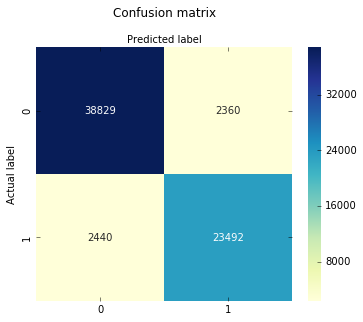

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     41189
           1       0.91      0.91      0.91     25932

   micro avg       0.93      0.93      0.93     67121
   macro avg       0.92      0.92      0.92     67121
weighted avg       0.93      0.93      0.93     67121



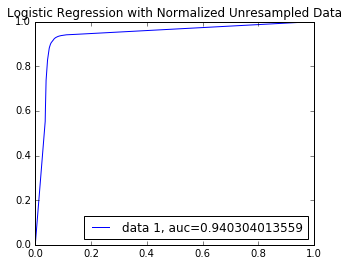

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Logistic Regression with Normalized Unresampled Data')
plt.show()